In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom

# El problema de la moneda

Al realizar un volado 250 veces, una moneda resulta en águila un total de 140 ocasiones, y en sol las 110 restantes. Esto pudiera resultar sospechoso para una persona con inclinaciones hacia el juego que casualmente tiene conocimientos de estadística. Si la moneda fuera justa, la probabilidad de obtener un resultado tan extremo como ese es menor al $7\%$.

¿Estos datos proporcionan evidencia de que la moneda está trucada?

## Distribución binomial

$$\binom{n}{k}p^k(1-p)^{1-k}$$

En donde:
- $n$: Total de eventos
- $k$: Eventos exitosos
- $p$: Probabilidad de observar un éxito

En un escenario en el que se hacen 2 lanzamientos, se tiene el espacio de eventos $\{AA,AS,SA,SS\}$. Por lo que las probabilidades de observar $k$ águilas se pueden resumir en la tabla:

|$k$|Eventos|$p$|
|:-|:-|:-|
|0|$\{SS\}$|0.25|
|1|$\{AS,SA\}$|0.5|
|2|$\{AA\}$|0.25|

In [6]:
n = 2
p = 0.5
k = np.arange(0, n+1)

binom.pmf(k, n, p)

array([0.25, 0.5 , 0.25])

Por ejemplo, para un escenario en el que se lanzan 250 veces una moneda, se podría esperar los siguiente:

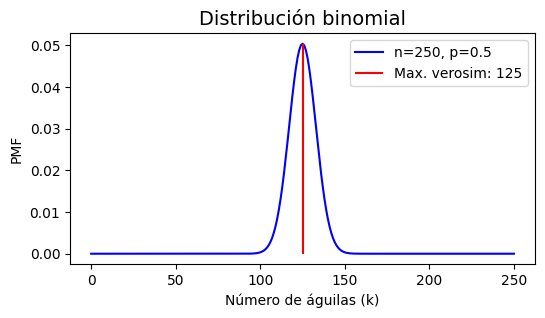

In [24]:
n = 250
p = 0.5
k = np.arange(0, n+1)

# Función de masa de probabilidad
pmf = binom.pmf(k, n, p)

# Configuración de figura
plt.figure(figsize=(6,3))

# Elementos de figura
plt.plot(k, pmf, label=f'n={n}, p={p}', color='blue')
plt.vlines(x=pmf.argmax(), ymin=pmf.min(), ymax=pmf.max(), color='red', label=f'Max. verosim: {pmf.argmax()}')

# Anotaciones y estilo
plt.title('Distribución binomial', fontsize=14)
plt.xlabel('Número de águilas (k)', fontsize=10)
plt.ylabel('PMF', fontsize=10)
plt.legend()

plt.show()

En este caso, para 250 lanzamientos de monedas el número de águilas esperadas serían 125. Pero a pesar de ello, la probabilidad de que esto ocurra es apenas del $5\%$. En el problema de la moneda se obtuvieron 140, lo cual es aún menos probable.

In [32]:
print(f'Máxima verosimilitud\tk=125\t{pmf[125]*100:.2f}%')
print(f'Probabilidad evento\tk=140\t{pmf[140]*100:.2f}%')

Máxima verosimilitud	k=125	5.04%
Probabilidad evento	k=140	0.84%


Para determinar la probabilidad de obtener algo al menos tan extremo como 140 lanzamientos resultantes en águila, se puede obtener la masa que se acumula después de 140 éxitos, lo cual es lo mismo que observar 110 fracasos.

In [66]:
print(f'Algo tan extremo como 140 éxitos o más:\t\t{100*pmf[140:].sum():.2f}%')
print(f'Algo tan extremo como 110 éxitos o menos:\t{100*pmf[:111].sum():.2f}%')
print(f'Juntando ambas colas de la distribución:\t{100*pmf[140:].sum() + 100*pmf[:111].sum():.2f}%')

Algo tan extremo como 140 éxitos o más:		3.32%
Algo tan extremo como 110 éxitos o menos:	3.32%
Juntando ambas colas de la distribución:	6.64%
